In [1]:
import numpy as np

In [2]:
import pandas as pd
df_target = pd.read_csv("target_hakaton_spb.csv", sep=';', encoding='Windows-1251')
df_target

,gorod,geo_h3_10,lat_h3,lon_h3,atm_category,target,atm_cnt
0,Екатеринбург,8a10c2283357fff,56.865861,60.532224,category4,95.333333,1
1,Екатеринбург,8a10c2288087fff,56.885391,60.588203,category3,30652.666667,4
2,Екатеринбург,8a10c228820ffff,56.891648,60.605399,category2,1162.166667,1
3,Екатеринбург,8a10c2288adffff,56.895039,60.598777,category1,2961.333333,1
4,Екатеринбург,8a10c228944ffff,56.896206,60.625911,category1,2963.333333,1
...,...,...,...,...,...,...,...
533,Санкт-Петербург,8a1106ab67a7fff,59.983488,30.227538,category1,2535.833333,1
534,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category1,23519.500000,2
535,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category4,94.500000,1
536,Санкт-Петербург,8a1106ab6ae7fff,59.996443,30.219656,category2,489.500000,1


# Only Spb

In [3]:
df_companies = pd.read_csv("train/osm_amenity.csv")
data = df_target.merge(df_companies, on=["geo_h3_10"], how='right')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24640 entries, 0 to 24639
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gorod                               438 non-null    object 
 1   geo_h3_10                           24640 non-null  object 
 2   lat_h3                              438 non-null    float64
 3   lon_h3                              438 non-null    float64
 4   atm_category                        438 non-null    object 
 5   target                              438 non-null    float64
 6   atm_cnt                             438 non-null    float64
 7   city                                24640 non-null  object 
 8   Автозапчасти для иномарок           1606 non-null   float64
 9   Авторемонт и техобслуживание (СТО)  3129 non-null   float64
 10  Алкогольные напитки                 2702 non-null   float64
 11  Аптеки                              4081 

In [4]:
data = data.drop(['gorod', 'lat_h3', 'lon_h3'], axis=1)
data

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953869,83.163008
1,8a0bb0200b37fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,54.948563,83.153038
2,8a0bb0201cd7fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.958064,83.174064
3,8a0bb0201d97fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953799,83.167407
4,8a0bb0204027fff,NaN,NaN,NaN,Новосибирск,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.935864,83.126481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,59.708838,30.021463
24636,8a1106cc8367fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.571796,30.123930
24637,8a1106cc9407fff,NaN,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,59.574353,30.139236
24638,8a11154206effff,NaN,NaN,NaN,Нижний Новгород,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.524786,31.234655


In [5]:
# функция для превращения NaN в 0
def recode_empty_cells(dataframe, list_of_columns):

    for column in list_of_columns:
      dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
      dataframe[column] = dataframe[column].fillna(0)

    return dataframe


In [6]:
recode_empty_cells(data, data.columns)

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008
1,8a0bb0200b37fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038
2,8a0bb0201cd7fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064
3,8a0bb0201d97fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407
4,8a0bb0204027fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463
24636,8a1106cc8367fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930
24637,8a1106cc9407fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236
24638,8a11154206effff,0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655


In [7]:
data['is_atm'] = np.where((data.atm_cnt > 0), 1, 0)
data

,geo_h3_10,atm_category,target,atm_cnt,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon,is_atm
0,8a0bb0200a5ffff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008,0
1,8a0bb0200b37fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038,0
2,8a0bb0201cd7fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064,0
3,8a0bb0201d97fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407,0
4,8a0bb0204027fff,0,0.0,0.0,Новосибирск,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,8a1106c49667fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463,0
24636,8a1106cc8367fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930,0
24637,8a1106cc9407fff,0,0.0,0.0,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236,0
24638,8a11154206effff,0,0.0,0.0,0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655,0


### Только Санкт-Петербург

In [8]:
data_spb = data[data['city'] == 'Новосибирск']
#data_spb.drop([3472,3473,3474])#stange atm for 3 cities


In [9]:
data_spb_atm_1 = data_spb[data_spb['is_atm'] == 1]
data_spb_atm_1 = data_spb_atm_1[data_spb_atm_1['city'] == 'Новосибирск']
print(data_spb_atm_1.shape)

data_spb_atm_0 = data_spb[data_spb['is_atm'] == 0]
data_spb_atm_0 = data_spb_atm_0[data_spb_atm_0['city'] == 'Новосибирск']
print(data_spb_atm_0.shape)

(101, 30)
(4345, 30)


# Алгоритм поиска ближайшего банкомата (минимальное расстояние до банкомата)

In [10]:
for index_atm_0, row_atm_0 in data_spb_atm_0.iterrows():
    print(row_atm_0)
    print(row_atm_0.lat, row_atm_0.lon)
    break

geo_h3_10                             8a0bb0200a5ffff
atm_category                                        0
target                                            0.0
atm_cnt                                           0.0
city                                      Новосибирск
Автозапчасти для иномарок                         0.0
Авторемонт и техобслуживание (СТО)                0.0
Алкогольные напитки                               0.0
Аптеки                                            0.0
Банки                                             0.0
Быстрое питание                                   0.0
Доставка готовых блюд                             0.0
Женская одежда                                    0.0
Кафе                                              0.0
Косметика / Парфюмерия                            0.0
Ногтевые студии                                   0.0
Овощи / Фрукты                                    0.0
Парикмахерские                                    0.0
Платёжные терминалы         

In [11]:
from geopy.distance import geodesic
from tqdm import tqdm
data_distance = pd.DataFrame(columns=(['geo_h3_10','lat', 'lan', 'distance']))


for index_atm_0, row_atm_0 in tqdm(data_spb_atm_0.iterrows()):
    distance = []
    for index_atm_1, row_atm_1 in data_spb_atm_1.iterrows():
        distance.append(geodesic([row_atm_0.lat, row_atm_0.lon], [row_atm_1.lat, row_atm_1.lon]).km)
    new_row = {'geo_h3_10':row_atm_0.geo_h3_10, 'lat':row_atm_0.lat, 'lan':row_atm_0.lon, 'min_distance':min(distance)}
    data_distance = data_distance.append(new_row, ignore_index=True)
    #print(row_atm_0.geo_h3_10, [row_atm_0.lat, row_atm_0.lon], min(distance))

0it [00:00, ?it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_14676/3244634974.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distance = data_distance.append(new_row, ignore_index=True)
1it [00:00,  1.07it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_14676/3244634974.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distance = data_distance.append(new_row, ignore_index=True)
C:\Users\dyush\AppData\Local\Temp/ipykernel_14676/3244634974.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_distance = data_distance.append(new_row, ignore_index=True)
3it [00:01,  3.31it/s]C:\Users\dyush\AppData\Local\Temp/ipykernel_14676/3244634974.py:11: FutureWarning: The frame.append method is deprecated and will be r

In [12]:
del data_distance['distance']
data_distance.to_csv('min_distance_to atm')
data_distance

,geo_h3_10,lat,lan,min_distance
0,8a0bb0200a5ffff,54.953869,83.163008,3.027841
1,8a0bb0200b37fff,54.948563,83.153038,2.176723
2,8a0bb0201cd7fff,54.958064,83.174064,3.876200
3,8a0bb0201d97fff,54.953799,83.167407,3.264816
4,8a0bb0204027fff,54.935864,83.126481,0.425625
...,...,...,...,...
4340,8a0bb1d9331ffff,55.122684,82.833805,4.140183
4341,8a0bb1d9a6d7fff,55.145833,82.898072,1.945834
4342,8a0bb1d9a6dffff,55.14691,82.899185,2.067205
4343,8a0bb1d9ecaffff,55.130346,82.832744,4.164958


In [13]:
data_distance.describe()

,min_distance
count,4345.000000
mean,1.175986
std,1.163646
min,0.139331
25%,0.423268
50%,0.782697
75%,1.460762
max,7.804573


In [14]:
print(data_distance.sort_values('min_distance').head(20))
print()
print(data_distance.sort_values('min_distance').tail(20))

            geo_h3_10        lat        lan  min_distance
2215  8a0bb034c0effff  55.101057  82.972848      0.139331
2204  8a0bb034c01ffff  55.098905   82.97062      0.139332
2996  8a0bb0369127fff  55.129432  82.899058      0.139334
3005  8a0bb0369897fff  55.127278  82.896832      0.139335
3105  8a0bb036b577fff  55.108093  82.939775      0.139337
1601  8a0bb0343977fff  55.061756  82.970291      0.139362
1597  8a0bb0343927fff  55.059602  82.968066      0.139363
1605  8a0bb03439b7fff  55.056244  82.973552      0.139365
1187  8a0bb03406e7fff   55.05409  82.971327      0.139366
2431  8a0bb03512f7fff  55.029233  83.026229      0.139368
1923  8a0bb0345637fff  55.067713  82.936135      0.139369
2429  8a0bb03512a7fff  55.027081  83.024003      0.139369
2432  8a0bb035130ffff  55.029365  83.017411      0.139369
2438  8a0bb0351767fff  55.023819  83.022868      0.139372
1146  8a0bb0340467fff  55.048803  82.959147      0.139374
1410  8a0bb0342177fff  55.038694  82.977807      0.139377
1405  8a0bb034

In [15]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

px.scatter(x=data_distance.index, 
           y=data_distance.sort_values('min_distance')['min_distance']).show()

In [19]:
px.scatter(x=data_distance.index[:4300], 
           y=data_distance.sort_values('min_distance')['min_distance'][:4300]).show()

In [18]:
px.scatter(x=data_distance.index[4300:], 
           y=data_distance.sort_values('min_distance')['min_distance'][4300:]).show()

In [20]:
import pandas as pd
data_distance.sort_values('min_distance',inplace=True)
#data_distance.reindex
#data_distance1 = data_distance.head(3872)
#data_distance1

In [139]:
#data_distance = pd.read_csv('min_distance_to_atm.csv')

In [21]:
import folium
map = folium.Map(location=[data_distance['lat'].mean(),data_distance['lan'].mean()], zoom_start = 15)
      
for index, row in data_distance.iterrows():
    if row.min_distance > 3:
        folium.Marker(location=[row.lat, row.lan], icon=folium.Icon(color = 'black')).add_to(map)

In [23]:
#map = folium.Map(location=[df_target['lat_h3'].mean(),df_target['lon_h3'].mean()], zoom_start = 15)
      
for index, row in df_target.iterrows():
    folium.Marker(location=[row.lat_h3, row.lon_h3], icon=folium.Icon(color = 'blue')).add_to(map)

        
map.save("map_stand_clusters_novosib.html")

## Too far hexagons  

(361, 2)


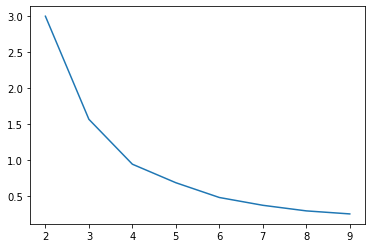

In [34]:
import matplotlib.pyplot as plt
data_distance_far = data_distance[data_distance['min_distance'] > 3]
data_distance_far = data_distance_far[['lat','lan']]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print(data_distance_far.shape)
x = range(2,10)
y = []
silhouette = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(data_distance_far)
  y.append(kmeans.inertia_)
  silhouette.append(silhouette_score(data_distance_far,kmeans.labels_))
plt.plot(x,y)
diff_arr = []
for i in range(7):
  diff_arr.append(y[i]-y[i+1])
diff_arr 
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_distance_far)
cluster_centers = kmeans.cluster_centers_

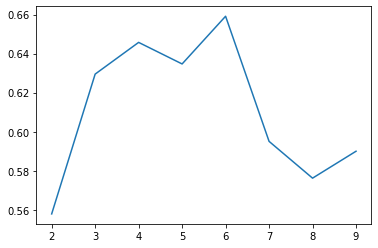

In [35]:
plt.plot(x,silhouette)

Итак, для Новосибирска лучше 6 кластеров

In [36]:
#map.save("map_stand_clusters4.html")
map = folium.Map(location=[data_distance['lat'].mean(),data_distance['lan'].mean()], zoom_start = 15)
for elem in cluster_centers:
    folium.Marker(location=[elem[0], elem[1]], icon=folium.Icon(color = 'red')).add_to(map)
for index, row in df_target.iterrows():
    folium.Marker(location=[row.lat_h3, row.lon_h3], icon=folium.Icon(color = 'blue')).add_to(map)
map.save("map_stand_clusters_cleaned_novosib_6.html")

In [ ]:
#map.save("map_stand_clusters4.html")
map = folium.Map(location=[data_distance['lat'].mean(),data_distance['lan'].mean()], zoom_start = 15)
for elem in cluster_centers:
    folium.Marker(location=[elem[0], elem[1]], icon=folium.Icon(color = 'red')).add_to(map)
for index, row in df_target.iterrows():
    folium.Marker(location=[row.lat_h3, row.lon_h3], icon=folium.Icon(color = 'blue')).add_to(map)
map.save("map_stand_clusters_cleaned_novosib_6.html")

#### 6 clusters best for elbow

In [97]:
# добавляем в данные population
df_population = pd.read_csv("data/train/rosstat_population_all_cities.csv")
data_distance.sort_values('min_distance').tail(20)

pd.merge(data_distance, df_population, on=["geo_h3_10"]).sort_values('min_distance').head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/rosstat_population_all_cities.csv'

In [ ]:



df_companies[df_companies['geo_h3_10'] == '8a1104812a2ffff'].T

,12113
geo_h3_10,8a1104812a2ffff
city,Санкт-Петербург
Автозапчасти для иномарок,NaN
Авторемонт и техобслуживание (СТО),NaN
Алкогольные напитки,NaN
Аптеки,NaN
Банки,NaN
Быстрое питание,NaN
Доставка готовых блюд,NaN
Женская одежда,NaN


In [ ]:
df_population[df_population['geo_h3_10'] == '8a110441ea57fff']

,geo_h3_10,city,population,lat,lon
